# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [207]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
#import visuals as vs

%matplotlib inline   
from sklearn.preprocessing import QuantileTransformer              

In [181]:
# Importing the Dataset
#try:
dataset = pd.read_csv("/Users/cegrib/Downloads/Wholesale_Data.csv")  
dataset.drop(labels=(['Channel','Region']),axis=1,inplace=True)
    #print('Wholesale customers has {} samples with {} features each'.format(*data.shape))
#except:
   # print('Sorry! Dataset could not be loaded.')
    
dataset              

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [182]:
dataset.describe()             

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [183]:
dataset.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [184]:
#Check for nulls
dataset.isnull().sum()                

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No nulls found

# Outlier detection

In [185]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in dataset.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(dataset[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(dataset[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <= Q3 + step))])
    lista = dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)
    
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)          

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
29,43088,2100,2609,1200,1107,823
39,56159,555,902,10002,212,2916
47,44466,54259,55571,7782,24171,6465
52,40721,3916,5876,532,2587,1278
87,43265,5025,8117,6312,1579,14351
103,56082,3504,8906,18028,1480,2498
125,76237,3473,7102,16538,778,918
129,42312,926,1510,1718,410,1819
176,45640,6958,6536,7368,1532,230
181,112151,29627,18148,16745,4948,8550


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
28,4113,20484,25957,1158,8604,5206
38,4591,15729,16709,33,6956,433
45,5181,22044,21531,1740,7353,4985
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
28,4113,20484,25957,1158,8604,5206
43,630,11095,23998,787,9529,72
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
77,12205,12697,28540,869,12034,1009
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
22,31276,1917,4469,9408,2381,4334
39,56159,555,902,10002,212,2916
40,24025,4332,4757,9510,1145,5864
47,44466,54259,55571,7782,24171,6465
70,16705,2037,3202,10643,116,1365
72,4420,5139,2661,8872,1321,181
73,19899,5332,8713,8132,764,648
88,7864,542,4042,9735,165,46
91,12754,2762,2530,8693,627,1117
93,11314,3090,2062,35009,71,2698


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,630,11095,23998,787,9529,72
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
77,12205,12697,28540,869,12034,1009
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
92,9198,27472,32034,3232,18906,5130


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
17,5876,6157,2933,839,370,4478
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
24,22647,9776,13792,2915,4482,5778
28,4113,20484,25957,1158,8604,5206
36,29955,4362,5428,1729,862,4626
40,24025,4332,4757,9510,1145,5864
45,5181,22044,21531,1740,7353,4985


In [186]:
outliers        

[[29,
  39,
  47,
  52,
  87,
  103,
  125,
  129,
  176,
  181,
  239,
  258,
  259,
  282,
  284,
  285,
  289,
  370,
  377,
  436],
 [23,
  28,
  38,
  45,
  47,
  49,
  56,
  61,
  65,
  85,
  86,
  92,
  109,
  163,
  171,
  181,
  183,
  211,
  216,
  251,
  254,
  265,
  309,
  319,
  325,
  358,
  384,
  427],
 [28,
  43,
  47,
  49,
  56,
  61,
  65,
  77,
  85,
  86,
  92,
  109,
  145,
  163,
  201,
  205,
  211,
  216,
  251,
  304,
  331,
  333,
  343,
  437],
 [22,
  39,
  40,
  47,
  70,
  72,
  73,
  88,
  91,
  93,
  103,
  112,
  125,
  126,
  143,
  181,
  183,
  195,
  196,
  230,
  240,
  265,
  277,
  283,
  284,
  287,
  310,
  325,
  328,
  334,
  337,
  338,
  339,
  371,
  381,
  393,
  401,
  406,
  413,
  425,
  427,
  431,
  435],
 [43,
  47,
  49,
  56,
  61,
  65,
  77,
  85,
  86,
  92,
  145,
  155,
  163,
  173,
  200,
  201,
  209,
  211,
  216,
  251,
  303,
  304,
  312,
  319,
  331,
  333,
  343,
  349,
  351,
  437],
 [2,
  4,
  17,
  22,
  23,


In [187]:
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes          

[22,
 23,
 28,
 39,
 40,
 43,
 45,
 47,
 49,
 56,
 61,
 65,
 77,
 85,
 86,
 87,
 92,
 103,
 109,
 125,
 145,
 163,
 171,
 181,
 183,
 201,
 211,
 216,
 251,
 265,
 284,
 304,
 319,
 325,
 331,
 333,
 343,
 358,
 384,
 427,
 437]

In [188]:
# Removing outliers

useful_data = dataset.drop(dupes, axis=0).reset_index(drop=True)         

# Observations
Datapoints considered outliers present in more than one feature are: 22,
 23,
 28,
 39,
 40,
 43,
 45,
 47,
 49,
 56,
 61,
 65,
 77,
 85,
 86,
 87,
 92,
 103,
 109,
 125,
 145,
 163,
 171,
 181,
 183,
 201,
 211,
 216,
 251,
 265,
 284,
 304,
 319,
 325,
 331,
 333,
 343,
 358,
 384,
 427,
 437].

K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated. Because of this, the outliers were removed

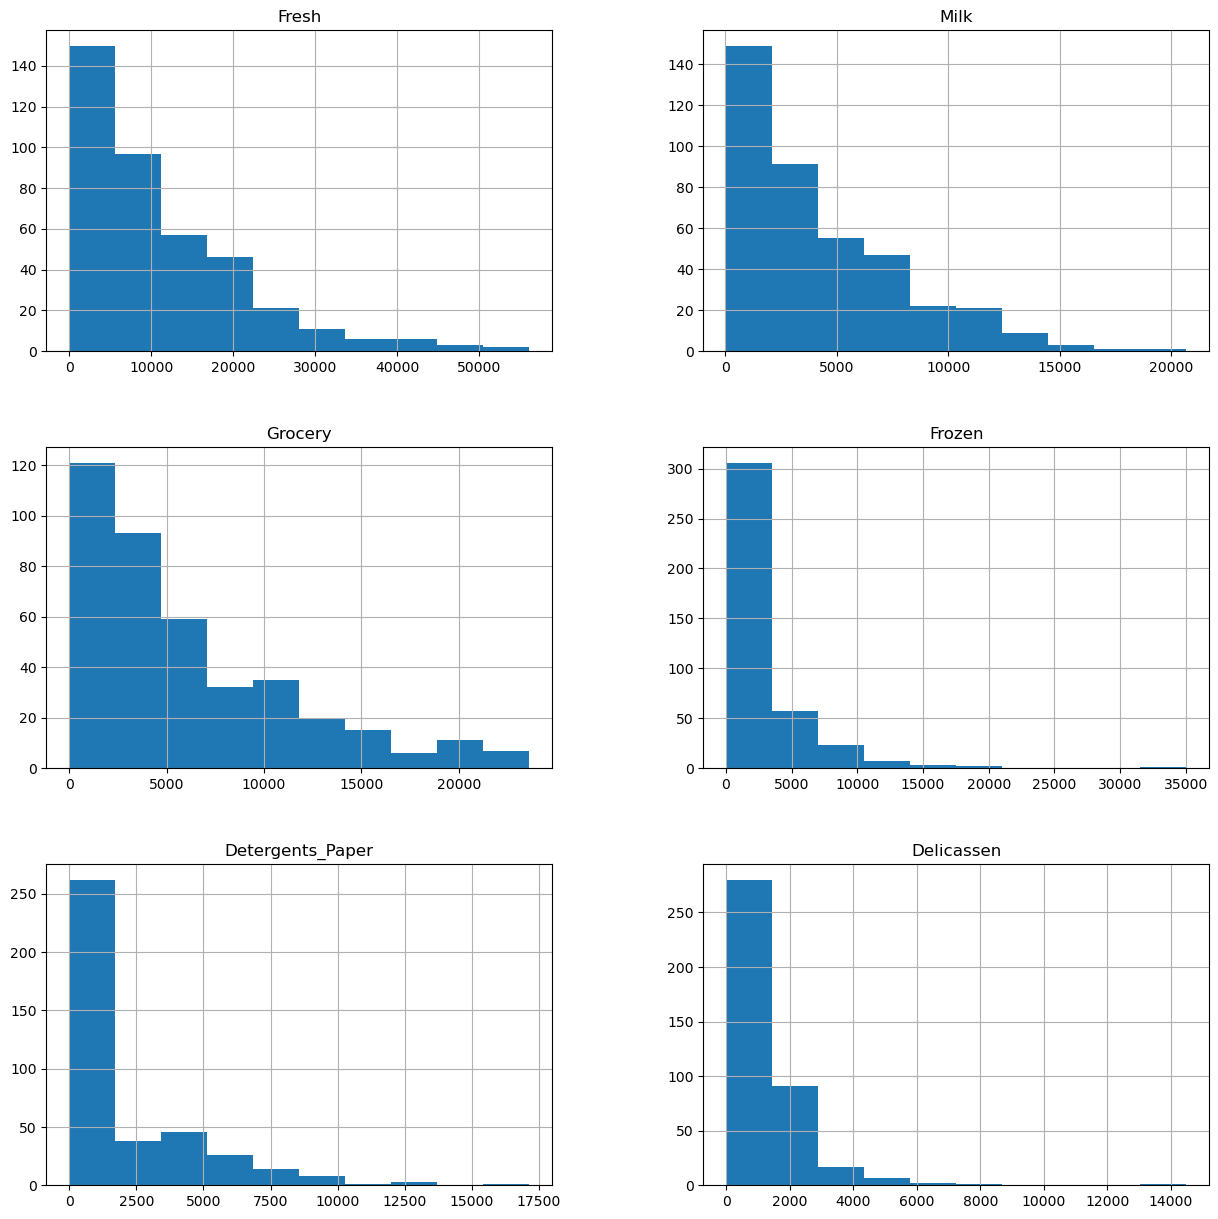

In [190]:
p = useful_data.hist(figsize = (15,15))                     

array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicassen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicassen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicassen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xlabel='M

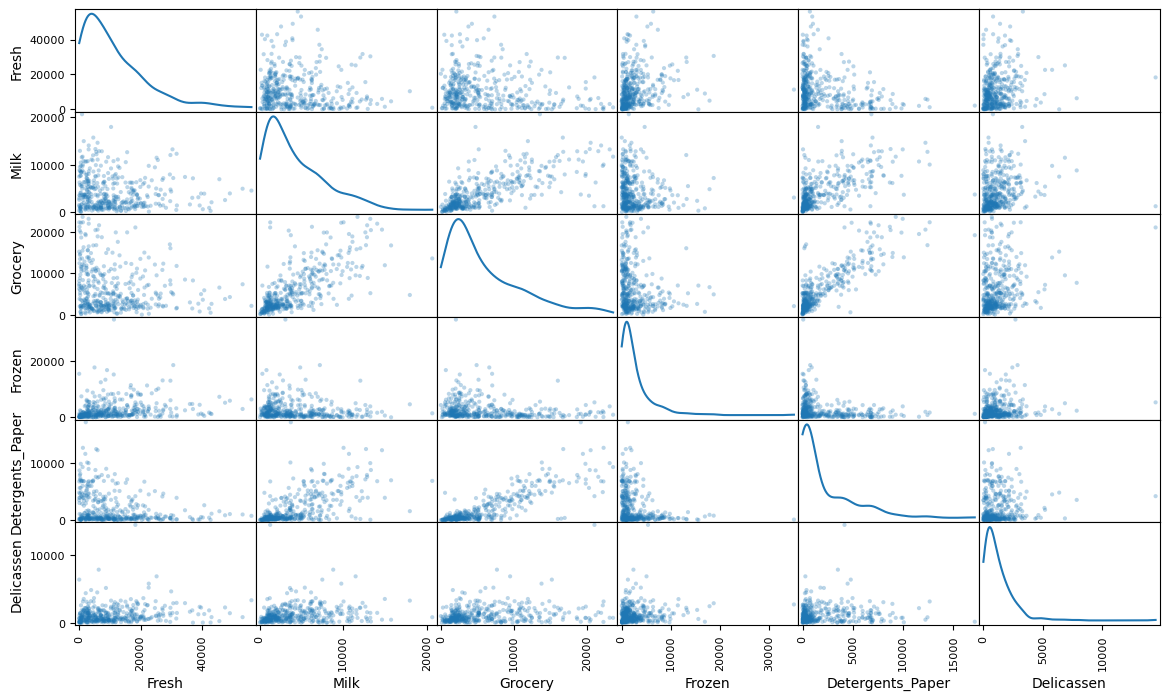

In [191]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(useful_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')         

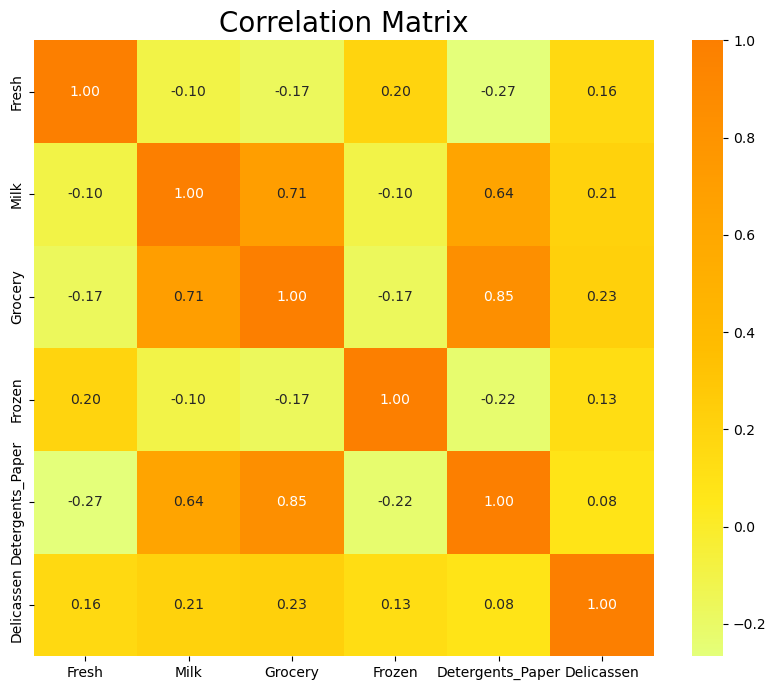

In [192]:
# Correlation matrix graph of variables
f, ax = plt.subplots(figsize= [10,8])
sns.heatmap(useful_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Wistia" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()             

How do our samples compare?
Customers who buy grocery are most likely to buy detergents_paper given the correlation between the two items. A similar observation was noted for grocery and milk as well as detergents_paper and milk.

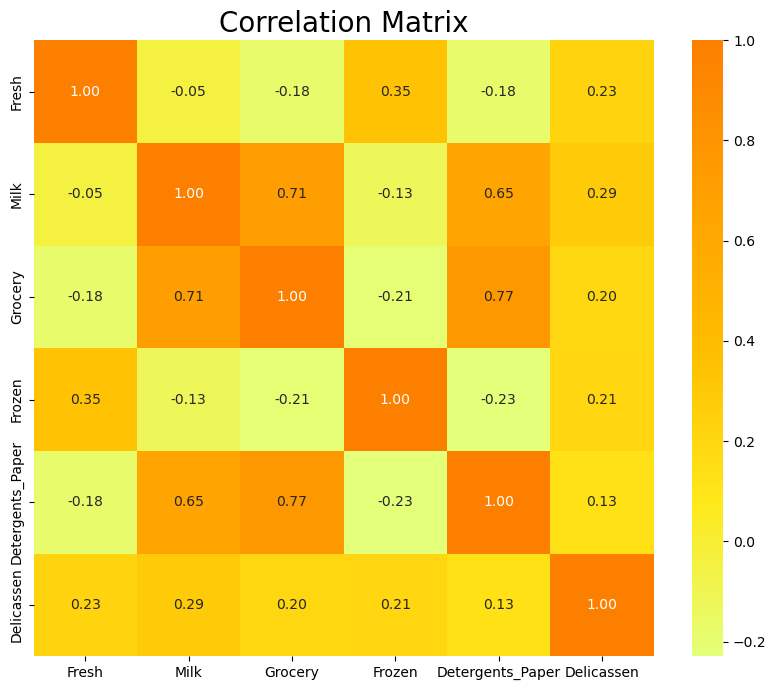

In [193]:
# Scale the data using the natural logarithm
log_data = np.log(useful_data)

f, ax = plt.subplots(figsize= [10,8])
sns.heatmap(log_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Wistia" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()        

Observation

After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. For any pair of features we have identified earlier as being correlated, we observe here that correlation is still present.

In [194]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
data_grocery = log_data.drop('Grocery', axis=1)

# Split the data into training and testing sets(0.20) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_grocery, useful_data.Grocery, test_size=0.20, random_state=42)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))        

Prediction score is: 0.6171612285245167


A high prediction score is an indicator of a very good fit. 

In [208]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples) 

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


In [210]:
# Display the log-transformed sample data
# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

display(log_samples)  

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


In [211]:
log_samples.shape 

(3, 6)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [213]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(useful_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples) 

In [214]:
print(pca.components_) 

[[ 9.80471714e-01 -6.32343471e-02 -1.38950317e-01  7.93167541e-02
  -9.36724499e-02  1.74289758e-02]
 [ 1.80776250e-01  4.57646408e-01  7.91769705e-01 -8.50057163e-02
   3.47259125e-01  5.62634425e-02]
 [-6.71432060e-02  1.05131763e-01  6.54000364e-02  9.87450571e-01
  -2.20064933e-02  6.79633888e-02]
 [-1.64740380e-02  8.79360514e-01 -4.35910984e-01 -7.09369550e-02
  -1.76445086e-01  1.64434427e-02]
 [-3.48642947e-02 -2.30872324e-02  2.79510430e-01 -7.82399492e-02
  -7.11362386e-01  6.38723294e-01]
 [-2.05377090e-04 -4.12378580e-02 -2.85257625e-01 -1.64532668e-02
   5.77046769e-01  7.63985472e-01]]


In [215]:
print(pca.explained_variance_)   

[1.08833344e+08 4.00028333e+07 1.11209801e+07 5.15001156e+06
 1.81033972e+06 1.23513730e+06]


In [226]:
pca_samples  

array([[-9746.52410133, -9321.97794743, -2784.86853482,  -413.52115034,
         -320.30843154,  -139.5061363 ],
       [-9743.92945104, -9324.03268236, -2782.27591446,  -413.04067609,
         -318.85814658,  -139.47195797],
       [-9753.34731416, -9330.90404118, -2782.23167823,  -415.4170361 ,
         -316.27487998,  -144.45496076]])

In [228]:
# Generate PCA results plot
pca_results = (useful_data, pca)     

In [225]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)  

SyntaxError: unexpected EOF while parsing (4193340018.py, line 2)

In [ ]:
Implementation: Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [232]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(useful_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(useful_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2']  

SyntaxError: unexpected EOF while parsing (2211518023.py, line 11)

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.